# Evaluation of GP/Kriging performance: GaussianProcesses.jl vs. pyKriging vs GPy

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.size'] = 12
#plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['legend.frameon']=False
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['legend.fontsize']=14
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True

### Read in prediction data:

In [103]:
y_real = np.genfromtxt("y_shuffled.csv")
y_pred_gaussianprocesses = np.genfromtxt("y_predict_julia_gaussianprocesses.csv", delimiter=",")[:,1]
y_pred_pyKriging = np.genfromtxt("y_predict_python_pyKriging.csv")
y_pred_GPy = np.genfromtxt("y_predict_python_GPy.csv")

In [104]:
x=np.linspace(1,400,400)

### Plot prediction data: first 300 points are training, last 100 points are testing samples

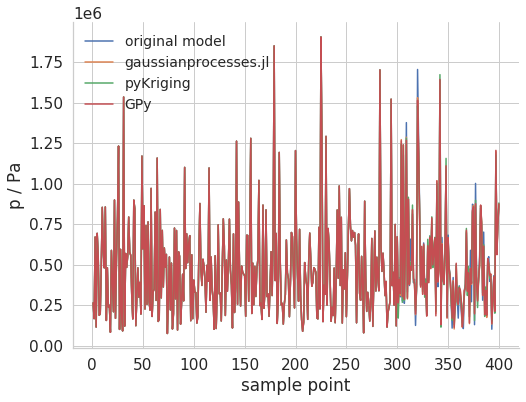

In [105]:
plt.plot(x,y_real, label='original model')
plt.plot(x,y_pred_gaussianprocesses, label='gaussianprocesses.jl')
plt.plot(x,y_pred_pyKriging, label='pyKriging')
plt.plot(x,y_pred_GPy, label='GPy')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('p / Pa')
plt.xlabel('sample point')
plt.legend()

### Plot residuals:

Text(0.5, 1.0, 'Difference plot')

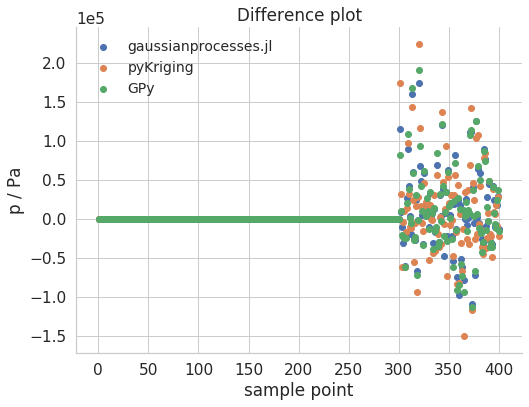

In [151]:
plt.scatter(x,y_real-y_pred_gaussianprocesses, label='gaussianprocesses.jl')
plt.scatter(x,y_real-y_pred_pyKriging, label='pyKriging')
plt.scatter(x,y_real-y_pred_GPy, label='GPy')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('p / Pa')
plt.xlabel('sample point')
plt.legend()
plt.title('Difference plot')

### Analysis of statsitical quanties: mean and std of residuals

In [147]:
objects = ("gaussianprocesses", "GPy", "pyKriging")
y_pos = np.arange(len(objects))
residualmean = [np.mean(y_real-y_pred_gaussianprocesses), np.mean(y_real-y_pred_GPy), np.mean(y_real-y_pred_pyKriging)]

Text(0.5, 1.0, 'mean of residuals')

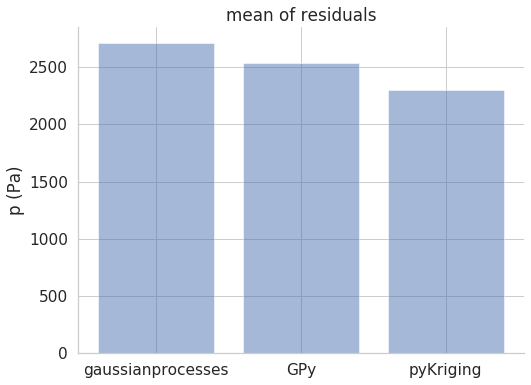

In [148]:
plt.bar(y_pos, residualmean, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('p (Pa)')
plt.title('mean of residuals')

In [149]:
residualstd = [np.std(y_real-y_pred_gaussianprocesses), np.std(y_real-y_pred_GPy), np.std(y_real-y_pred_pyKriging)]

Text(0.5, 1.0, 'standard deviation of residuals')

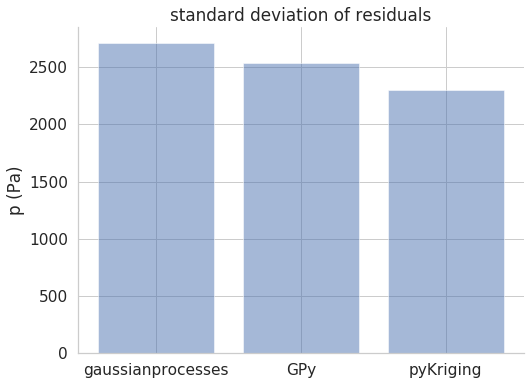

In [150]:
plt.bar(y_pos, residualmean, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('p (Pa)')
plt.title('standard deviation of residuals')

### ==>> The quality of all proxy models is comparable

## Evaluation of Runtime (build+optimization/prediction)

In [121]:
time_df = pd.read_csv("time.csv")

In [152]:
buildtime = [time_df[i].iloc[0] for i in objects]
predicttime = [time_df[i].iloc[1] for i in objects]

Text(0.5, 1.0, 'running times')

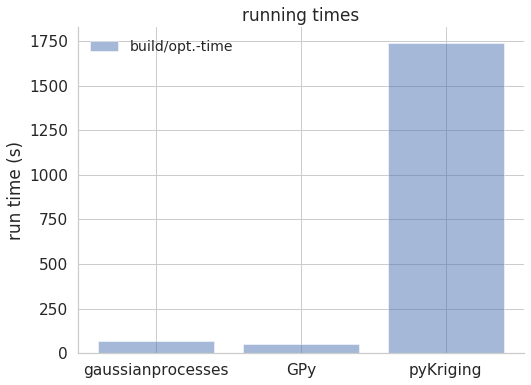

In [146]:
plt.bar(y_pos, buildtime, align='center', alpha=0.5, label="build/opt.-time")
plt.xticks(y_pos, objects)
plt.ylabel('run time (s)')
plt.legend()
plt.title('running times')

Text(0.5, 1.0, 'running times')

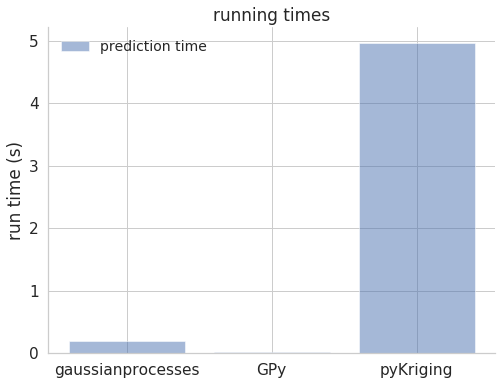

In [145]:
plt.bar(y_pos, predicttime, align='center', alpha=0.5, label="prediction time")
plt.xticks(y_pos, objects)
plt.ylabel('run time (s)')
plt.legend()
plt.title('running times')

### ==>> Packages for gaussian process modeling perform much better than the pyKriging module
### However, detail of quality and speed depend also on minimization scheme and parameter adjustment